#**Tarea final**
**Integrantes**:   

Dylan Castellanos - 2210730

María José Pérez - 2211380

Laura Valentia Moreno - 2210730



#Primera parte 
Primero se importan las bibliotecas y los datos/archivos que estaremos usando en todo el proceso

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
GAP = pd.read_csv('https://raw.githubusercontent.com/sierraporta/Herramientas-Computacionales-Basicas/main/Tarea_final/Global_active_power.csv')
GI = pd.read_csv('https://raw.githubusercontent.com/sierraporta/Herramientas-Computacionales-Basicas/main/Tarea_final/Global_intensity.csv')
GRP = pd.read_csv('https://raw.githubusercontent.com/sierraporta/Herramientas-Computacionales-Basicas/main/Tarea_final/Global_reactive_power.csv')
volt = pd.read_csv('https://raw.githubusercontent.com/sierraporta/Herramientas-Computacionales-Basicas/main/Tarea_final/Voltage.csv')

#Segunda parte
Ahora para poder juntar los cuatro archivos en una sola tabla, la funcion de pandas .merge() toma en cuenta dos argumentos. Por lo que se hizo dos listas para almacenar estos datos a parte y usar la funcion .merge()

In [ ]:
data1 = pd.merge(GAP, GRP, on=['Datetime'])
data2 = pd.merge(GI, volt, on=['Datetime'])
data = pd.merge(data1, data2, on=['Datetime'])
data

,Datetime,Global_active_power,Global_reactive_power,Global_intensity,Voltage
0,2010-01-01 00:00:00,1.790,0.236,7.4,240.65
1,2010-01-01 00:01:00,1.780,0.234,7.4,240.07
2,2010-01-01 00:02:00,1.780,0.234,7.4,240.15
3,2010-01-01 00:03:00,1.746,0.186,7.2,240.26
4,2010-01-01 00:04:00,1.686,0.102,7.0,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,0.000,4.0,240.43
457391,2010-11-26 20:59:00,0.944,0.000,4.0,240.00
457392,2010-11-26 21:00:00,0.938,0.000,3.8,239.82
457393,2010-11-26 21:01:00,0.934,0.000,3.8,239.70


Convertimos los datos de los archivos GAP(**Global_active_Power**) y GRP(**Global_reactive_Power**), a vatios por hora, multiplicandolos por 1000/60

In [ ]:
data["Global_active_power"] = round(data["Global_active_power"]*1000/60, 3)
data["Global_reactive_power"] = round(data["Global_reactive_power"]*1000/60, 3)
data

,Datetime,Global_active_power,Global_reactive_power,Global_intensity,Voltage
0,2010-01-01 00:00:00,29.833,3.933,7.4,240.65
1,2010-01-01 00:01:00,29.667,3.900,7.4,240.07
2,2010-01-01 00:02:00,29.667,3.900,7.4,240.15
3,2010-01-01 00:03:00,29.100,3.100,7.2,240.26
4,2010-01-01 00:04:00,28.100,1.700,7.0,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,15.767,0.000,4.0,240.43
457391,2010-11-26 20:59:00,15.733,0.000,4.0,240.00
457392,2010-11-26 21:00:00,15.633,0.000,3.8,239.82
457393,2010-11-26 21:01:00,15.567,0.000,3.8,239.70


#Resample de los archivos

Los datos principales estan dados para cada minuto. Para poder verlo cada día, semana o mes, se usa la funcion resample, la cual nos permite verlo en distintos mometos. La 'D' significa dias y 'M' los meses, y si alguien quisiera ver por semanas seria agregaria la letra 'W'. Además se quiere ver el promerio de cada dia y mes, por lo que simplemente agregamos la funcion .mean(). Sin embargo para hacer el *resample* primero se ajusta la columna Datatime 

In [ ]:
data['Datetime'] = pd.to_datetime(data['Datetime'])
data

,Datetime,Global_active_power,Global_reactive_power,Global_intensity,Voltage
0,2010-01-01 00:00:00,29.833,3.933,7.4,240.65
1,2010-01-01 00:01:00,29.667,3.900,7.4,240.07
2,2010-01-01 00:02:00,29.667,3.900,7.4,240.15
3,2010-01-01 00:03:00,29.100,3.100,7.2,240.26
4,2010-01-01 00:04:00,28.100,1.700,7.0,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,15.767,0.000,4.0,240.43
457391,2010-11-26 20:59:00,15.733,0.000,4.0,240.00
457392,2010-11-26 21:00:00,15.633,0.000,3.8,239.82
457393,2010-11-26 21:01:00,15.567,0.000,3.8,239.70


In [ ]:
data_D = data.resample('D', on='Datetime').mean()
data_D = data_D.dropna()
data_D.to_csv('DATAFRAME EN DIAS')
data_D

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Datetime,,,,
2010-01-01,14.169592,1.913614,3.537083,242.565722
2010-01-02,19.603921,1.444256,4.857778,243.631743
2010-01-03,15.031576,1.505511,3.757778,241.822778
2010-01-04,19.530563,1.672035,4.879028,241.754160
2010-01-05,15.279607,2.228298,3.929861,240.647167
...,...,...,...,...
2010-12-07,12.842301,3.309176,3.397222,240.218646
2010-12-08,6.130765,1.957152,1.623750,240.794931
2010-12-09,18.658474,2.330551,4.755694,241.619722


In [ ]:
data_W = data.resample('W', on='Datetime').mean()
data_W = data_W.dropna()
data_W.to_csv('DATAFRAME EN SEMANAS')
data_W

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Datetime,,,,
2010-01-03,16.268363,1.621127,4.050880,242.673414
2010-01-10,15.342877,2.124450,3.909127,240.588849
2010-01-17,22.711281,2.495720,5.659855,243.906723
2010-01-24,25.585780,2.201378,6.407362,242.399567
2010-01-31,25.800470,1.886696,6.427857,242.941153
2010-02-07,16.855998,2.117503,4.251478,241.840780
2010-02-14,17.545553,1.882097,4.395023,242.393924
2010-02-21,23.790043,1.594400,5.944028,242.465328
2010-02-28,18.727967,1.712066,4.692837,241.364385


In [ ]:
data_M = data.resample('M', on='Datetime').mean()
data_M = data_M.dropna()
data_M.to_csv('DATAFRAME EN MESES')
data_M

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Datetime,,,,
2010-01-31,21.677334,2.086377,5.430332,242.338522
2010-02-28,19.292318,1.824457,4.836624,242.002101
2010-03-31,19.500255,2.272798,4.920399,241.475284
2010-04-30,17.272230,2.159279,4.363496,241.442527
2010-05-31,17.932618,2.120356,4.551504,241.296151
2010-06-30,16.255105,2.425415,4.170282,240.888985
2010-07-31,12.982458,2.301545,3.337202,240.965167
2010-08-31,15.490872,2.180260,3.954423,241.422944
2010-09-30,16.625685,2.128339,4.223837,241.267517


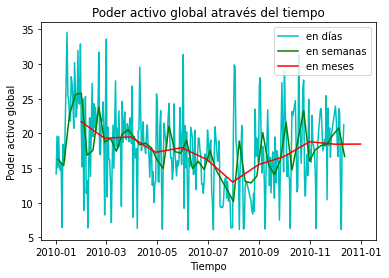

In [ ]:
plt.figure()
plt.plot(data_D['Global_active_power'], 'c', label='en días')
plt.plot(data_W['Global_active_power'], 'g', label='en semanas')
plt.plot(data_M['Global_active_power'], 'r', label='en meses')
plt.title('Poder activo global através del tiempo')
plt.ylabel('Poder activo global')
plt.xlabel('Tiempo')
plt.legend()

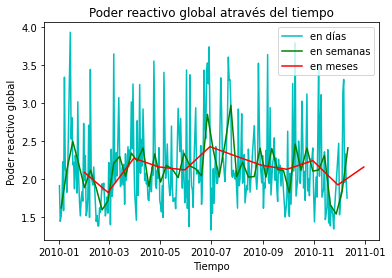

In [ ]:
plt.figure()
plt.plot(data_D['Global_reactive_power'], 'c', label='en días')
plt.plot(data_W['Global_reactive_power'], 'g', label='en semanas')
plt.plot(data_M['Global_reactive_power'], 'r', label='en meses')
plt.title('Poder reactivo global através del tiempo')
plt.ylabel('Poder reactivo global')
plt.xlabel('Tiempo')
plt.legend()

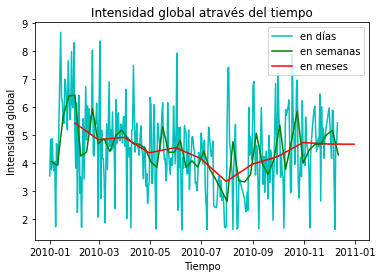

In [ ]:
plt.figure()
plt.plot(data_D['Global_intensity'], 'c', label= 'en días')
plt.plot(data_W['Global_intensity'], 'g', label= 'en semanas')
plt.plot(data_M['Global_intensity'], 'r', label='en meses')
plt.title('Intensidad global através del tiempo')
plt.ylabel('Intensidad global')
plt.xlabel('Tiempo')
plt.legend()

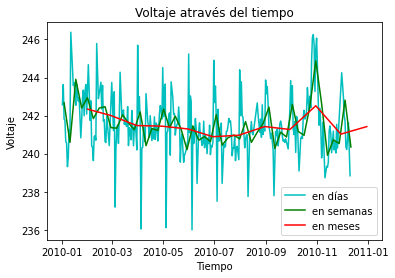

In [ ]:
plt.figure()
plt.plot(data_D['Voltage'], 'c', label='en días')
plt.plot(data_W['Voltage'], 'g', label='en semanas')
plt.plot(data_M['Voltage'], 'r', label='en meses')
plt.title('Voltaje através del tiempo')
plt.ylabel('Voltaje')
plt.xlabel('Tiempo')
plt.legend()

#**Regresión de los datos**

In [ ]:
from scipy.optimize import curve_fit

Para llevar a cabo todas las relaciones se uso la libreria **curve_fit** del modulo **scipy.optimize**. Además definimos la funciones que se usaran para determinar la relación.

In [ ]:
#Primero definimos lo que seria una funcion lineal, la que nos serviria para la relación 1 y 2
def lineal(x,a,b):
  return a*x+b

#Sin embargo en la relacion 3, se usa un funcion diferente, ya que aqui nos relacion 3 datos
def rel3(X,a1,a2,b):
    x,y = X
    return a1*x+a2*y+b

**La primera relacion esta dada por:** 

Global_active_power = $A_1$(Global intensity)+$B_1$

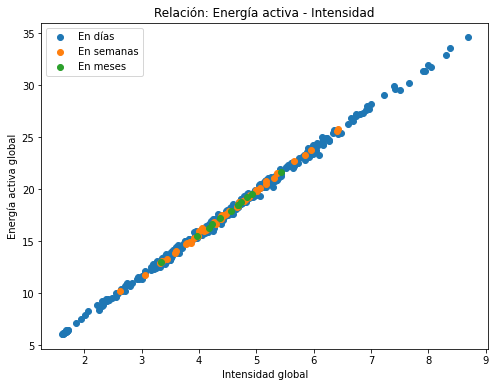

In [ ]:
plt.figure(figsize=(8,6))
#plt.scatter(data["Global_intensity"],data["Global_active_power"])
plt.scatter(data_D["Global_intensity"],data_D["Global_active_power"], label='En días')
plt.scatter(data_W["Global_intensity"],data_W["Global_active_power"], label='En semanas')
plt.scatter(data_M["Global_intensity"],data_M["Global_active_power"], label='En meses')
plt.title('Relación: Energía activa - Intensidad')
plt.ylabel('Energía activa global')
plt.xlabel('Intensidad global')
plt.legend()
plt.show()

Además fueron definidas dos funciónes las cuales nos permiten obtener los valores de la pendiente y su margen de error, a la misma vez. Esta función nos ayudará para la relacion 1 y 2.

In [ ]:
def get_fit(lineal,xdata,ydata,labelx,labely,r):
    popt, pcov = curve_fit(lineal, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    x=np.linspace(xdata.min(),xdata.max(),100)
    plt.figure(figsize=(8,6))
    plt.plot(x, lineal(x, *popt), 'r-',label= 'Relación teórica')
    plt.scatter(xdata,ydata,label="Datos obtenidos")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend()
    plt.show()
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    return #popt, np.sqrt(np.diag(pcov))


In [ ]:
def get_fit1(lineal,xdata,ydata,labelx,labely,r):
    popt, pcov = curve_fit(lineal, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(pcov,r)
    x=np.linspace(xdata.min(),xdata.max(),100)
    E=np.sqrt(np.mean((ydata-lineal(xdata, *popt))**2))
    print("Error on fit is ={}".format(E))


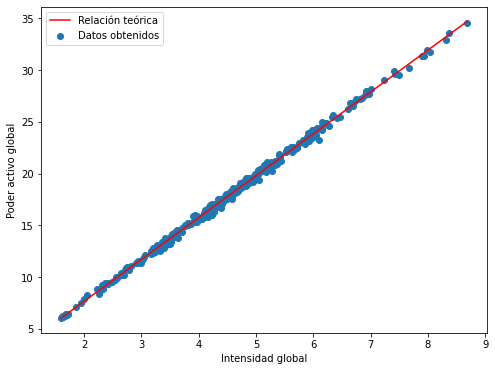

Coeficients are : [ 4.05 -0.46]
Sigma_Coeficients are : [0.01 0.05]
Error on fit is =0.25380827624568725


In [ ]:
#En dias
get_fit(lineal, data_D['Global_intensity'], data_D['Global_active_power'], 'Intensidad global', 'Poder activo global', 2)
get_fit1(lineal, data_D['Global_intensity'], data_D['Global_active_power'], 'Intensidad global', 'Poder activo global', 2)


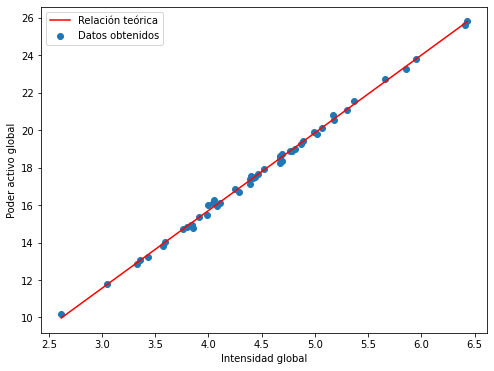

Coeficients are : [ 4.15 -0.89]
Sigma_Coeficients are : [0.03 0.11]
Error on fit is =0.1391723250911003


In [ ]:
#En semanas
get_fit(lineal, data_W['Global_intensity'], data_W['Global_active_power'], 'Intensidad global', 'Poder activo global', 2)
get_fit1(lineal, data_W['Global_intensity'], data_W['Global_active_power'], 'Intensidad global', 'Poder activo global', 2)

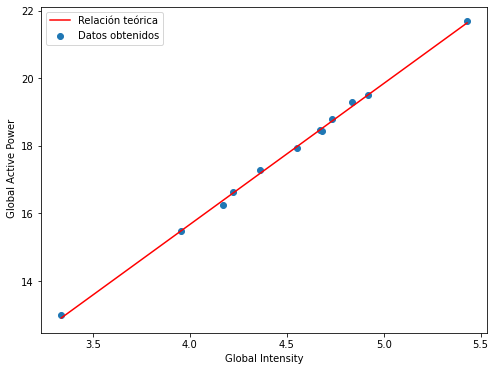

Coeficients are : [ 4.17 -1.01]
Sigma_Coeficients are : [0.04 0.19]
Error on fit is =0.07060102783239858


In [ ]:
#En meses
get_fit(lineal, data_M['Global_intensity'], data_M['Global_active_power'], 'Global Intensity', ' Global Active Power', 2)
get_fit1(lineal, data_M['Global_intensity'], data_M['Global_active_power'], 'Global Intensity', ' Global Active power', 2)

**La segunda relación** esta dada por: 

Global_active_power = $A_2$(Voltaje)+$B_2$

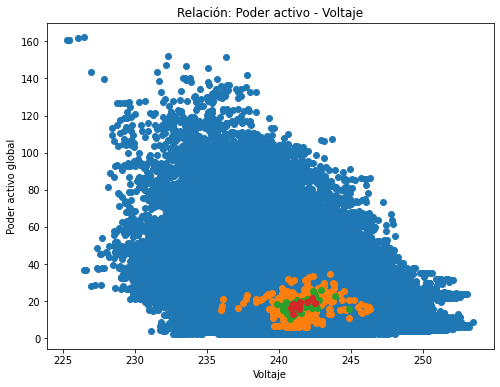

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data["Voltage"],data["Global_active_power"])
plt.scatter(data_D["Voltage"],data_D["Global_active_power"])
plt.scatter(data_W["Voltage"],data_W["Global_active_power"])
plt.scatter(data_M["Voltage"],data_M["Global_active_power"])
plt.title('Relación: Poder activo - Voltaje')
plt.xlabel('Voltaje')
plt.ylabel('Poder activo global')
plt.show()

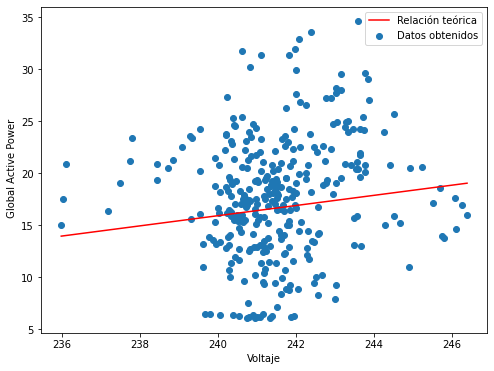

Coeficients are : [   0.49 -101.69]
Sigma_Coeficients are : [ 0.21 49.82]
Error on fit is =5.7829386815205694


In [ ]:
#En dias
get_fit(lineal, data_D['Voltage'], data_D['Global_active_power'], 'Voltaje', ' Global Active Power', 2)
get_fit1(lineal, data_D['Voltage'], data_D['Global_active_power'], 'Voltaje', ' Global Active Power', 2)


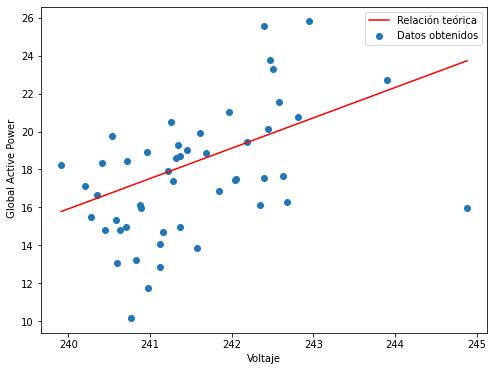

Coeficients are : [   1.6  -368.08]
Sigma_Coeficients are : [  0.43 103.05]
Error on fit is =2.9879042765759323


In [ ]:
#En Semanas
get_fit(lineal, data_W['Voltage'], data_W['Global_active_power'], 'Voltaje', ' Global Active Power', 2)
get_fit1(lineal, data_W['Voltage'], data_W['Global_active_power'], 'Voltaje', ' Global Active Power', 2)


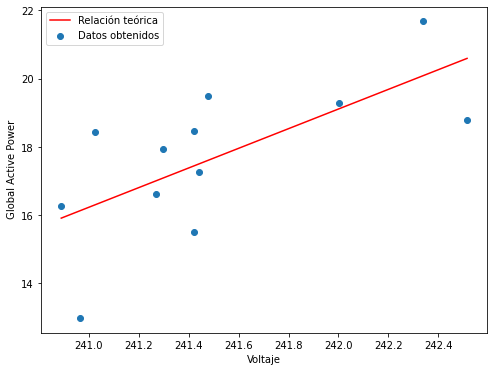

Coeficients are : [   2.88 -677.85]
Sigma_Coeficients are : [  1.  241.3]
Error on fit is =1.575945795501471


In [ ]:
#En Meses
get_fit(lineal, data_M['Voltage'], data_M['Global_active_power'], 'Voltaje', ' Global Active Power', 2)
get_fit1(lineal, data_M['Voltage'], data_M['Global_active_power'], 'Voltaje', ' Global Active Power', 2)

**La Tercera relación** esta dada por:  
Global_active_power = $A_31$(Global intensity)+$A_32$(Voltaje) + $B_3$



Para esta ultima relación se usó la funcion principlamente definida: rel3. Ademas se importa una biblioteca especial para graficar figuras 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def get_fit_2(rel3,xdata,ydata,zdata,labelx,labely,labelz,r):
    popt1, pcov1 = curve_fit(rel3, (xdata, ydata), zdata)
    popt1, pcov1 = np.around(popt1,r), np.around(np.sqrt(np.diag(pcov1)),r)
    x=np.linspace(xdata.min(),xdata.max(),100)
    plt.figure(figsize=(8,6))
    plt.plot(x, rel3(x, *popt1), 'r-',label=r'fit: {}$\pm${}'.format(np.around(tuple(popt1),r),tuple(pcov1)))
    plt.scatter(xdata,ydata,zdata,label="Original data")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.zlabel(labelz)
    plt.legend()
    plt.show()
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    return #popt, np.sqrt(np.diag(pcov))


#Conclusiones:
De las relaciones 1 y 2, se puede concluir que:

- La relación entre el Poder activo y la Intensidad (1) es tan clara, que se puede evidenciar una función lineal creciente que pasa cerca de todos los puntos, con un error de entre 0.07% y 0.25%. Valores tan pequeños que, para grandes conjuntos de datos como el evaluado, son despreciables.

- Por otro lado, la relación entre el Poder activo y el Voltaje (2) no resulta ser tan evidente, puesto que los datos se ven desorganizados. Al compararlos con la recta de la función lineal creciente, la distancia entre los puntos y la recta resulta casi arbitraria, totalmente caótico a nuestro ojo. El margen de error de esta relación es bastante alto, llegando a ser desde 1.5% hasta 5.8%, cosa que nos indica que no hay relación entre el Poder activo y el Voltaje en nuestro dataframe.